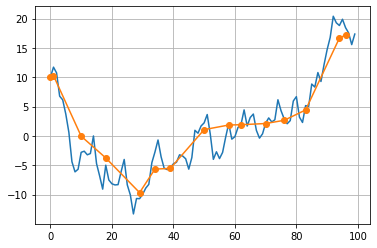

In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt

### EMA - irregular interval ###
# half life
H = 4

def ema(p, u, dt):
    a = 1 - math.exp(math.log(0.5) / H * dt)
    return a*p + (1 - a)*u

### Plot ###
N = 100

# initial price
p0 = 10

# volatility
v = 2
delta_prices = np.random.normal(0, v, N)

# prices
p = p0
prices = []
for dp in delta_prices:
    prices.append(p)
    p += dp

# moving averages
avgs = []

# irregular interval
t = 0
ts = []
u = p0
while t < N:
    ts.append(t)
    avgs.append(u)

    dt = np.random.randint(1, 3*H)
    t += dt
    
    if t < N:
        p = prices[t]
        u = ema(p, u, dt)

plt.plot(prices)
plt.plot(ts, avgs, marker="o")
plt.grid()
plt.show()

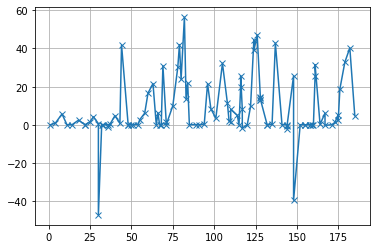

In [17]:
import math
import numpy as np
import matplotlib.pyplot as plt

N = 100

M = 1e18
v = 2
deltas = np.random.normal(0, v, N) * M

t = 1
ts = []
swaps = []
for delta in deltas:
    ts.append(t)
    if delta >= 0:
        swaps.append({
            "d_in": delta,
            # TODO: d_out from calc_y
            "d_out": 0.1 * M,
            "zero_for_one": True,
            "t": t,
        })
    else:
        swaps.append({
            "d_in": -delta,
            "d_out": 0.1 * M,
            "zero_for_one": False,
            "t": t
        })
    dt = np.random.randint(0, 5)
    t += dt

t0 = 0
u = 1
emas = []
prices = []
d0 = 0
d1 = 0
for s in swaps:
    if t != s["t"]:
        d0 = 0
        d1 = 0
        t = s["t"]

    if s["zero_for_one"]:
        d0 += s["d_in"]
        d1 -= s["d_out"]
    else:
        d0 -= s["d_out"]
        d1 += s["d_in"]

    p = 0
    if d0 != 0:
        p = -d1 / d0
        
    # dt = 1
    # u = ema(p, u, dt)
    # emas.append(u)
    prices.append(p)

plt.plot(ts, prices, marker="x")
# plt.plot(emas)

plt.grid()
plt.show()